In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('podatki_PM.csv')

In [3]:
data.head()

,Datum,Glob_sevanje_mean,Hitrost_vetra_mean,Sunki_vetra_max,Padavine_sum,Vlaga_mean,Temperatura_Krvavec_mean,Temperatura_lokacija_mean,PM10,PM_vceraj,sinD,cosD
0,2013-01-02,0.125,0.6750,2.9,0.0,79.1750,-2.9875,3.2000,44.3,51.4,0.034899,0.999391
1,2013-01-03,0.375,0.7375,2.6,0.0,93.5625,-4.5250,2.8750,49.0,44.3,0.052336,0.998630
2,2013-01-04,0.875,0.8875,3.2,0.0,93.3000,2.9625,0.6875,61.3,49.0,0.069756,0.997564
3,2013-01-05,0.750,1.0000,4.5,0.0,94.2625,2.9875,0.5875,38.9,61.3,0.087156,0.996195
4,2013-01-06,0.250,0.5750,2.3,0.0,87.6500,-0.2500,3.1625,30.3,38.9,0.104528,0.994522


In [4]:
data = data.dropna() #Se znebimo manjkajoćih (33 vrednosti)
data = data.drop(columns=['Datum'])

In [5]:
split_ratio = 0.8 #Nastavimo razdelitev na testno in učno množico
split_index = int(len(data) * split_ratio)

X = data.drop(columns=['PM10'])
y = data['PM10']

X_train = X.iloc[:split_index].values
y_train = y.iloc[:split_index].values

X_test = X.iloc[split_index:].values
y_test = y.iloc[split_index:].values

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [6]:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred = X_test @ theta

mse = mean_squared_error(y_test, y_pred)
print(f'Manual Linear Regression MSE: {mse}')


Manual Linear Regression MSE: 68.68826504314079


In [7]:
model = LinearRegression()
model.fit(X_train[:, 1:], y_train)

y_pred_sklearn = model.predict(X_test[:, 1:])


mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f'SciKit-learn Linear Regression MSE: {mse_sklearn}')


SciKit-learn Linear Regression MSE: 68.68826504314352


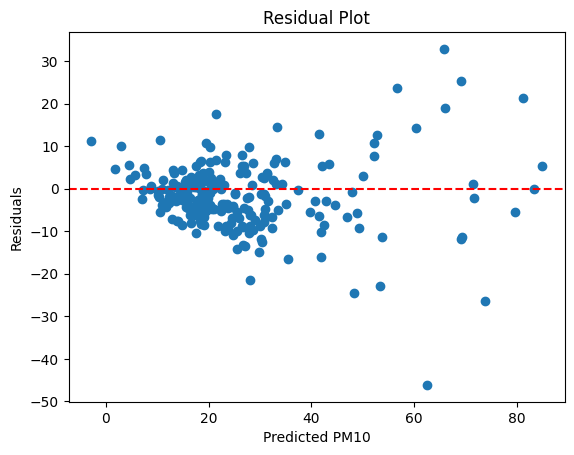

In [8]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted PM10')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [9]:
#log transformation
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


theta_log = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train_log
y_pred_log = X_test @ theta_log
mse_log = np.mean((np.expm1(y_pred_log) - y_test) ** 2)
print(f'Log-transformed Linear Regression MSE is significantly worse: {mse_log}')

Log-transformed Linear Regression MSE is significantly worse: 83.99387871387974
